---

# Regresiones Lineales Multivariadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Carga de los datos a analizar

In [2]:
clientes = pd.read_csv('Ecommerce.csv')

In [3]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Análisis de correlación

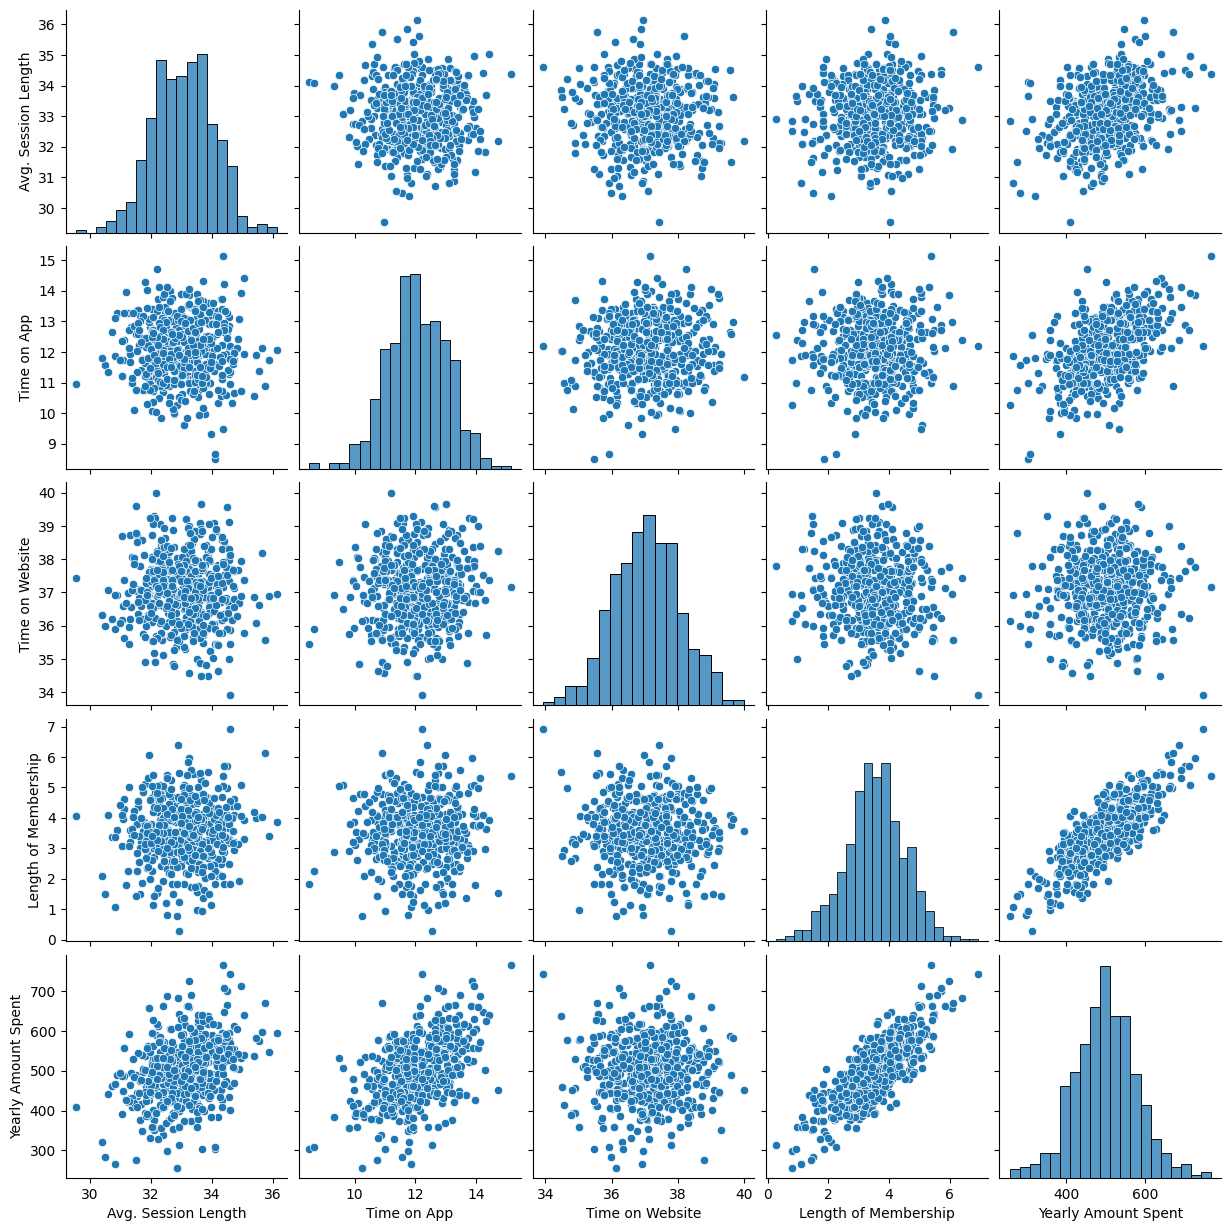

In [4]:
sns.pairplot(clientes)

In [5]:
variables = ['Avg. Session Length', 'Avg. Session Length', 'Avg. Session Length', 'Length of Membership', 'Yearly Amount Spent']

clientes[variables].corr()

,Avg. Session Length,Avg. Session Length,Avg. Session Length,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,1.000000,1.000000,0.060247,0.355088
Avg. Session Length,1.000000,1.000000,1.000000,0.060247,0.355088
Avg. Session Length,1.000000,1.000000,1.000000,0.060247,0.355088
Length of Membership,0.060247,0.060247,0.060247,1.000000,0.809084
Yearly Amount Spent,0.355088,0.355088,0.355088,0.809084,1.000000


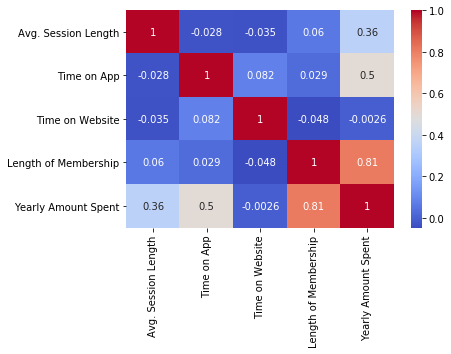

In [10]:
sns.heatmap(clientes.corr(), cmap='coolwarm', annot=True)

### Formulación del modelo

In [7]:
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as metrics

#### 1. Modelo con una sola variable

In [ ]:
lm = smf.ols(formula='Q("Yearly Amount Spent") ~ Q("Length of Membership")', data=clientes).fit()

In [78]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("Yearly Amount Spent")   R-squared:                       0.655
Model:                                  OLS   Adj. R-squared:                  0.654
Method:                       Least Squares   F-statistic:                     943.9
Date:                      Thu, 18 Jun 2020   Prob (F-statistic):          4.81e-117
Time:                              23:49:02   Log-Likelihood:                -2629.9
No. Observations:                       500   AIC:                             5264.
Df Residuals:                           498   BIC:                             5272.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   272.3998      7.675     35.492      0.000     257.320     287.479
Q("Length of Membership")    64.2187      2.090     30.723      0.000      60.112      68.326
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
y_true = clientes['Yearly Amount Spent']
y_pred = lm.predict(clientes['Length of Membership'])
print( 'MAE: {}'.format(metrics.meanabs(y_true,y_pred)) ) 
print( 'MSE: {}'.format(metrics.mse(y_true,y_pred)) )
print( 'RMSE: {}'.format(metrics.rmse(y_true,y_pred)) )
print( 'R2: {}'.format(lm.rsquared))
print( 'R2-Adj: {}'.format(lm.rsquared_adj))

MAE: 37.39100548868192
MSE: 2168.4067169170785
RMSE: 46.566154199343956
R2: 0.654616220408238
R2-Adj: 0.6539226786821501


#### 2. Modelo con todas las variables

In [91]:
lm = smf.ols(formula='''Q("Yearly Amount Spent") 
                            ~ Q("Avg. Session Length") + 
                              Q("Time on App") + 
                              Q("Time on Website") + 
                              Q("Length of Membership")''',data=clientes).fit()

In [81]:
lm.params

Intercept                   -1051.594255
Q("Avg. Session Length")       25.734271
Q("Time on App")               38.709154
Q("Time on Website")            0.436739
Q("Length of Membership")      61.577324
dtype: float64

In [82]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("Yearly Amount Spent")   R-squared:                       0.984
Model:                                  OLS   Adj. R-squared:                  0.984
Method:                       Least Squares   F-statistic:                     7766.
Date:                      Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                              23:49:22   Log-Likelihood:                -1856.9
No. Observations:                       500   AIC:                             3724.
Df Residuals:                           495   BIC:                             3745.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Q("Avg. Session Length")     25.7343      0.451     57.057      0.000      24.848      26.620
Q("Time on App")             38.7092      0.451     85.828      0.000      37.823      39.595
Q("Time on Website")          0.4367      0.444      0.983      0.326      -0.436       1.309
Q("Length of Membership")    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
y_true = clientes['Yearly Amount Spent']
y_pred = lm.predict(clientes[['Avg. Session Length','Time on App','Time on Website','Length of Membership']])
print( 'MAE: {}'.format(metrics.meanabs(y_true,y_pred)) ) 
print( 'MSE: {}'.format(metrics.mse(y_true,y_pred)) )
print( 'RMSE: {}'.format(metrics.rmse(y_true,y_pred)) )
print( 'R2: {}'.format(lm.rsquared))
print( 'R2-Adj: {}'.format(lm.rsquared_adj))

MAE: 7.877162860953783
MSE: 98.47102522149004
RMSE: 9.923256785022247
R2: 0.9843155370226726
R2-Adj: 0.9841887938875022


Text(0, 0.5, 'Predicción Y')

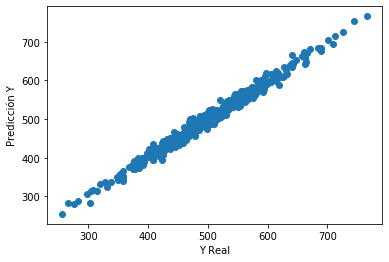

In [84]:
plt.scatter(y_true,y_pred)
plt.xlabel('Y Real')
plt.ylabel('Predicción Y')

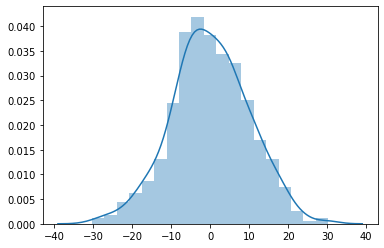

In [52]:
sns.distplot(y_true-y_pred)

### Conclusiones

- Por cada unidad que se incrementa Avg. Session Length, el gasto anual promedio se incrementa en 35.7 US
- Por cada unidad que se incrementa Time on App, el gasto anual promedio se incrementa en 38.7 US
- Por cada unidad que se incrementa Time on Website, el gasto anual promedio se incrementa en 0.4 US
- Por cada unidad que se incrementa Length of Membership, el gasto anual promedio se incrementa en 61.57 US

In [92]:
lm.params

Intercept                   -1051.594255
Q("Avg. Session Length")       25.734271
Q("Time on App")               38.709154
Q("Time on Website")            0.436739
Q("Length of Membership")      61.577324
dtype: float64

¿En qué debemos invertir? ¿Aplicación web o mobile?
Eso va a depender...


## Selección del Modelo

#### 3. Modelo con eliminación en reversa de variables

In [87]:
lm = smf.ols(formula='''Q("Yearly Amount Spent") ~ 
                            Q("Avg. Session Length") + 
                            Q("Time on App") + 
                            Q("Length of Membership")''', data=clientes).fit()

In [88]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q("Yearly Amount Spent")   R-squared:                       0.984
Model:                                  OLS   Adj. R-squared:                  0.984
Method:                       Least Squares   F-statistic:                 1.036e+04
Date:                      Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                              23:51:42   Log-Likelihood:                -1857.4
No. Observations:                       500   AIC:                             3723.
Df Residuals:                           496   BIC:                             3740.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1035.3396     15.983    -64.778      0.000   -1066.742   -1003.937
Q("Avg. Session Length")     25.7210      0.451     57.055      0.000      24.835      26.607
Q("Time on App")             38.7460      0.449     86.210      0.000      37.863      39.629
Q("Length of Membership")    61.5560      0.448    137.464      0.000      60.676      62.436
==============================================================================
Omnibus:                        0.248   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.883   Jarque-Bera (JB):                0.136
Skew:                          -0.027   Prob(JB):                        0.934
Kurtosis:                       3.060   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
y_true = clientes['Yearly Amount Spent']
y_pred = lm.predict(clientes[['Avg. Session Length','Time on App','Length of Membership']])
print( 'MAE: {}'.format(metrics.meanabs(y_true,y_pred)) ) 
print( 'MSE: {}'.format(metrics.mse(y_true,y_pred)) )
print( 'RMSE: {}'.format(metrics.rmse(y_true,y_pred)) )
print( 'R2: {}'.format(lm.rsquared))
print( 'R2-Adj: {}'.format(lm.rsquared_adj))

MAE: 7.889777736100408
MSE: 98.66342189357127
RMSE: 9.932946284641394
R2: 0.9842848920844948
R2-Adj: 0.9841898410285542
